<a href="https://colab.research.google.com/github/Vizzeyly/Hamoye-2022-Selenium-Group/blob/Abu_umar/Updated_Capstone_Project_Vishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=d8366114c98bb388c183269fab709be2a14596179f92b4020acae97ac4326811
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

In [4]:
url = 'https://raw.githubusercontent.com/garg1709/Hamoye-Data-Science-Internship/main/1st_Capstone_Project/Foreign_Exchange_Rates.csv'
df = pd.read_csv(url, sep=',')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [7]:
# Let's extract one country's data and try to understand its behaviour. We'll take UK for illustration purpose. All our EDA and model building
# will revolve around UK.

In [8]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [9]:
data = df[['Time Serie', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$']]
data.columns = ['date', 'rate']

In [10]:
data.head(15)

,date,rate
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.607
4,2000-01-07,0.6104
5,2000-01-10,0.6107
6,2000-01-11,0.6068
7,2000-01-12,0.6073
8,2000-01-13,0.6067
9,2000-01-14,0.6115


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5217 non-null   object
 1   rate    5217 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


In [12]:
data.rate.describe()

count     5217
unique    2303
top         ND
freq       198
Name: rate, dtype: object

In [13]:
data.nunique()

date    5217
rate    2303
dtype: int64

In [14]:
# We can see we have some value 'ND' in our dataset. Let's remove these values to ensure we are able to make forecasting accurately.
# We are not sure of what ND means (Maybe it stands for No Data).

In [15]:
# Remove rates with a value of ND.

data = data.drop(data[data['rate']=='ND'].index)

# Converts the rates to numeric value.

data['rate'] = pd.to_numeric(data.rate)
data['date'] = pd.to_datetime(data.date)

# Sort values by date. This is important as the values should always be in ascending order to make forecasts.
data = data.sort_values('date', ascending=True)

In [16]:
data1 = data.copy()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5019 non-null   datetime64[ns]
 1   rate    5019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.6 KB


In [18]:
data.set_index('date',inplace=True)

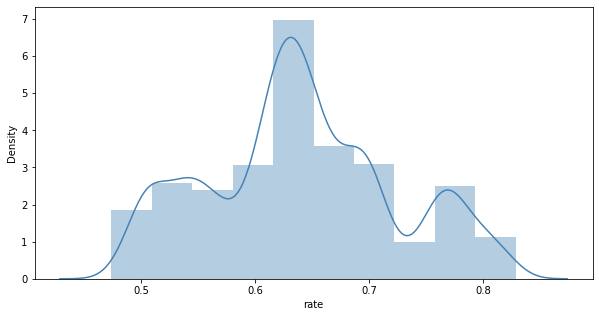

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');

In [20]:
# From the above graph, we can see that our UK Exchange Rates follows more or less a Gaussian Distribution.

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data.rate, marker_color='lightgreen'))

fig.update_layout(title='TIME-SERIES PLOT OF UNITED KINGDOM POUND RATE', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="grey"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

In [22]:
# From the plot above, we can see that the data is non-stationary.
# There is obviously trend in the dataset along with randomness. We cannot see any kind of seasonality in the dataset.

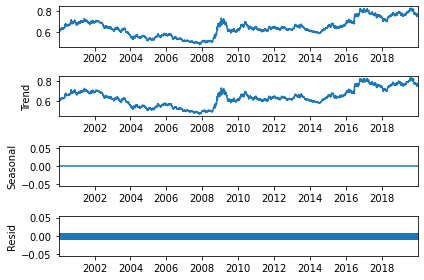

In [23]:
# We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.
sdec = seasonal_decompose(data, model='additive', freq = 1)
sdec.plot();

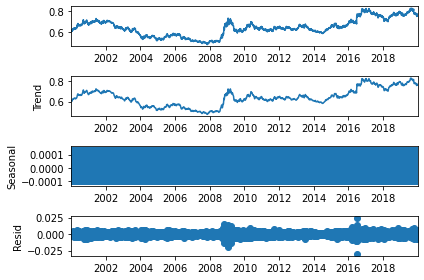

In [24]:
# We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.
sdec = seasonal_decompose(data, model='additive', freq = 5)
sdec.plot();

In [25]:
# It is pretty clear from the decomposition that there is no seasonal component in our Time Series.

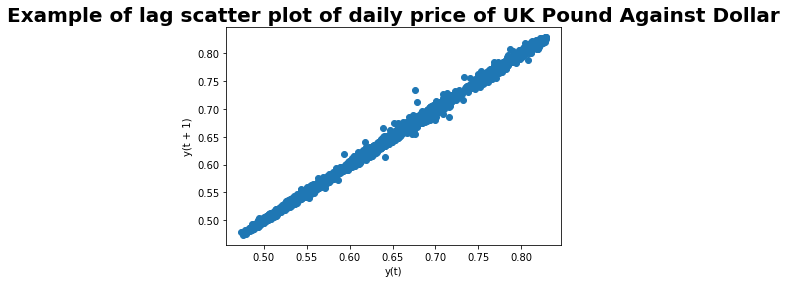

In [26]:
from pandas.plotting import lag_plot
lag_plot(series = data.rate)
plt.title('Example of lag scatter plot of daily price of UK Pound Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [27]:
# From the above lag plot, we can see that the values of exchange rates at time period t and t+1 are highly positively correlated which is evident
# from the coalesced datapoints moving from left to right upwards. This means that the values are highly dependent on the previous values.

In [28]:
values = pd.DataFrame(data.rate.values)
lags = 7
columns = [values]

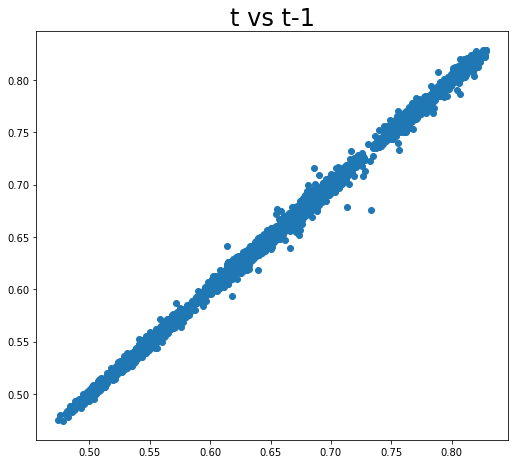

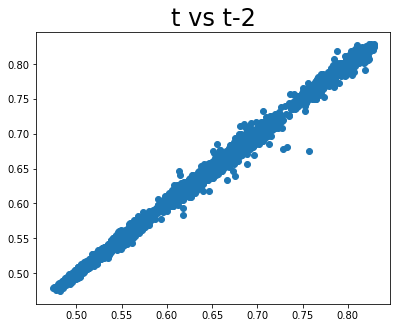

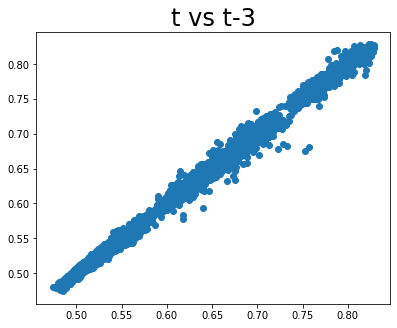

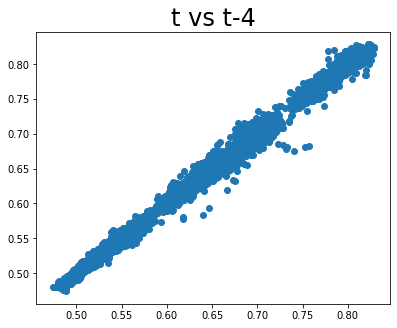

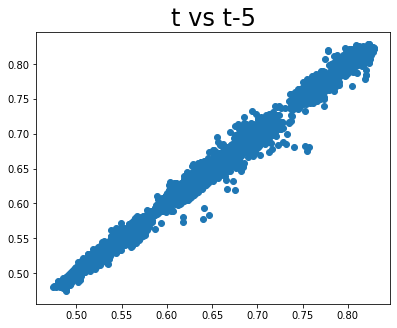

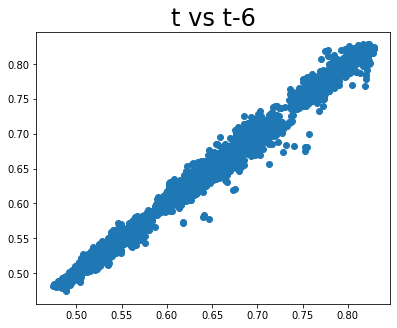

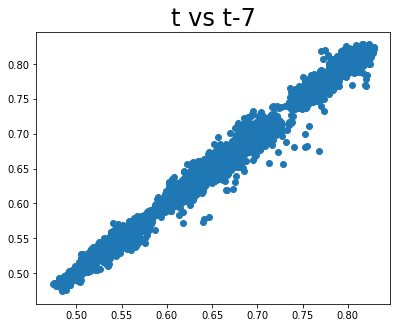

In [29]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(8,6))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

In [30]:
# As we can see from above lag plots, for 7 different lag values, there is high positive correlation among each one of them with values
# at time t.

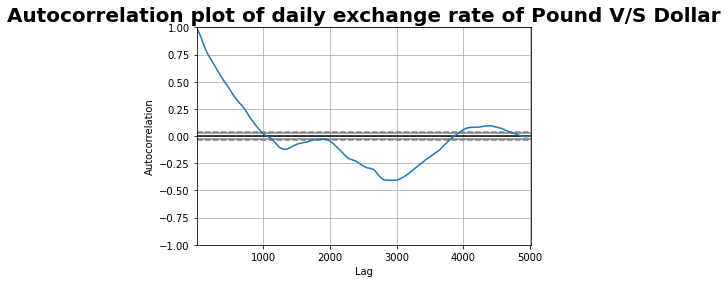

In [31]:
pd.plotting.autocorrelation_plot(data.rate)
plt.title('Autocorrelation plot of daily exchange rate of Pound V/S Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [32]:
# From the above AC plot, we can see that the initial lag values show a correlation with previous values. But it starts decreasing as time passes
# and becomes negative for a while. But for most of the part, it remains close to zero for higher values, which shows no correaltion.

In [33]:
# Let's perform ADF Test to confirm stationarity/non-stationarity of our dataset.

In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['rate'].tolist())
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.219928
p-value 0.664965
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<Figure size 864x432 with 0 Axes>

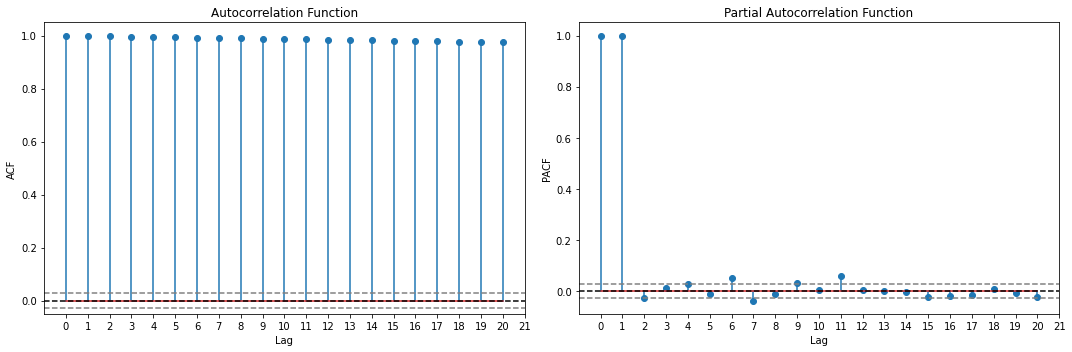

In [35]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data.rate, nlags = 20)
lag_pacf = pacf(data.rate, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [36]:
# Since our Test Statistic value is greater than our critical value at 5%, we can say that our time series is non-stationarity.
# We can also see from our ACF plot that there is high correlation between time series at time t and various other lag values. There is also
# no sign of any kind of seasonality.
# Now we'll difference our series once to see if this removes stationarity.

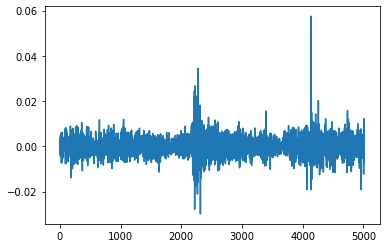

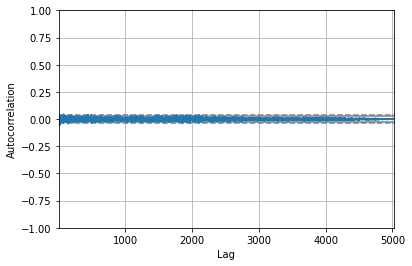

In [37]:
diff = list()
for i in range(1, len(data)):
  value = data['rate'].tolist()[i] - data['rate'].tolist()[i-1]
  diff.append(value)

# line plot

plt.plot(diff)
plt.show()

# Auto-correlation plot

pd.plotting.autocorrelation_plot(diff)
plt.show()

In [38]:
# Now let's plot our ACF and PACF plots.

<Figure size 864x432 with 0 Axes>

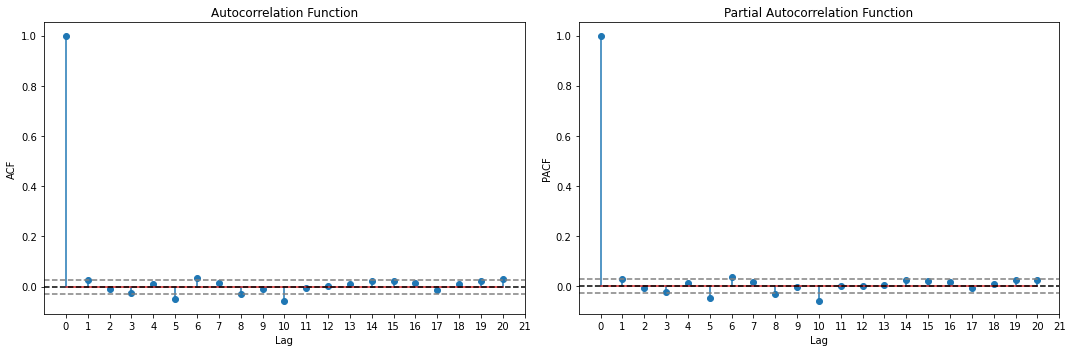

In [39]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [40]:
# From the first line plot, we can see that the differenced time series has a mean close to 0 and a very small variance.
# This shows us that the data has become stationary now.
# Also, from the autocorrelation plot, we can see that the AC values at different lags are now close to zero. This is also a sign of stationarity.
# But we'll again run the ADF test to check for stationarity.

In [41]:
# Let's run the ADF test again after differencing.

In [42]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.503825
p-value 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [43]:
# We can see that our p-value is now approximately close to 0, so we can say that our time-series is now stationary.

In [56]:
data2 = data.copy()

In [57]:
time = [i+1 for i in range(len(data2))]
data2['time'] = time

In [58]:
data2.head()

,rate,time
date,,
2000-01-03,0.6146,1
2000-01-04,0.6109,2
2000-01-05,0.6092,3
2000-01-06,0.6070,4
2000-01-07,0.6104,5


In [59]:
train = data2[0: int(len(data2) * 0.7)]
test = data2[int(len(data2) * 0.7): ]

In [60]:
X_train = train.drop('rate',axis=1)
X_test = test.drop('rate',axis=1)
y_train = train[['rate']]
y_test = test[['rate']]

In [61]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [68]:
predictions = model.predict(X_test)

In [69]:
y_test['RegOnTime'] = predictions

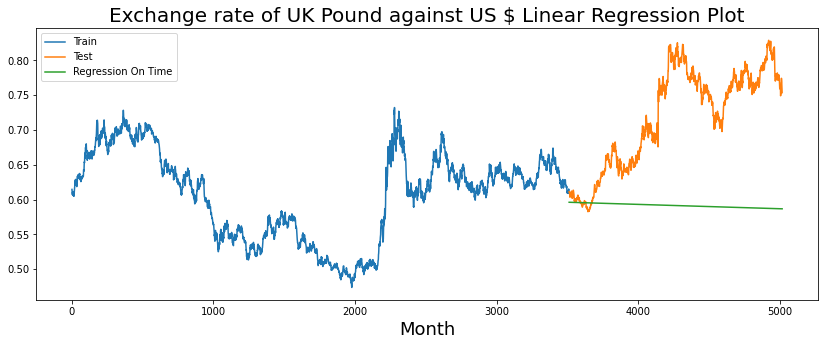

In [71]:
plt.figure(figsize=(14,5))
plt.plot(y_train['rate'].values, label = 'Train')   
plt.plot([None for i in y_train.values] + [x for x in y_test['rate'].values], label = 'Test')
plt.plot([None for i in y_train.values] + [x for x in y_test['RegOnTime'].values], label = 'Regression On Time')
plt.title('Exchange rate of UK Pound against US $ Linear Regression Plot', family='Arial', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.legend(loc = 'best')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
mean_absolute_percentage_error(y_test.rate,y_test.RegOnTime)

16.823056006452823

In [44]:
X_train, X_val = data1[:-30], data1[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
predictions = []

arima = ARIMA(X_train.rate,order=(10,1,10)).fit()
# Get a 30 days prediction.
predictions.append(arima.forecast(30))

In [47]:
#converting and reshaping 
predictions = np.array(predictions[0][0]).reshape((30,))

In [48]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.rate   No. Observations:                 4988
Model:               ARIMA(10, 1, 10)   Log Likelihood               20651.012
Method:                       css-mle   S.D. of innovations              0.004
Date:                Sun, 21 Aug 2022   AIC                         -41258.023
Time:                        06:19:30   BIC                         -41114.698
Sample:                             1   HQIC                        -41207.784
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.279e-05   5.39e-05      0.608      0.543   -7.29e-05       0.000
ar.L1.D.rate     -0.0756      0.086     -0.881      0.378      -0.244       0.092
ar.L2.D.rate      0.1525      0.047      3.275      0.001       0.061       0.244
ar.L3.D.rate     -0.4678      0.085     -5.509      0.000      -0.634      -0.301
ar.L4.D.rate     -0.2094      0.120     -1.744      0.081      -0.445       0.026
ar.L5.D.rate      0.1370      0.114      1.200      0.230      -0.087       0.361
ar.L6.D.rate     -0.3244      0.059     -5.477      0.000      -0.440      -0.208
ar.L7.D.rate     -0.3159      0.135     -2.345      0.019      -0.580      -0.052
ar.L8.D.rate      0.0942      0.084      1.118      0.264      -0.071       0.259
ar.L9.D.rate     -0.2175      0.065     -3.326      0.001      -0.346      -0.089
ar.L10.D.rate    -0.7358      0.061    -12.132      0.000      -0.855      -0.617
ma.L1.D.rate      0.1008      0.077      1.316      0.188      -0.049       0.251
ma.L2.D.rate     -0.1484      0.043     -3.474      0.001      -0.232      -0.065
ma.L3.D.rate      0.4473      0.083      5.379      0.000       0.284       0.610
ma.L4.D.rate      0.2240      0.113      1.981      0.048       0.002       0.446
ma.L5.D.rate     -0.1748      0.103     -1.705      0.088      -0.376       0.026
ma.L6.D.rate      0.3486      0.063      5.517      0.000       0.225       0.472
ma.L7.D.rate      0.3402      0.128      2.667      0.008       0.090       0.590
ma.L8.D.rate     -0.1359      0.074     -1.847      0.065      -0.280       0.008
ma.L9.D.rate      0.2162      0.057      3.808      0.000       0.105       0.328
ma.L10.D.rate     0.7120      0.057     12.578      0.000       0.601       0.823
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9276           -0.4019j            1.0109           -0.0651
AR.2             0.9276           +0.4019j            1.0109            0.0651
AR.3             0.5905           -0.8302j            1.0188           -0.1516
AR.4             0.5905           +0.8302j            1.0188            0.1516
AR.5             0.0643           -1.0249j            1.0269           -0.2400
AR.6             0.0643           +1.0249j            1.0269            0.2400
AR.7            -0.7317           -0.7690j            1.0615           -0.3710
AR.8            -0.7317           +0.7690j            1.0615            0.3710
AR.9            -0.9985           -0.2854j            1.0384           -0.4557
AR.10           -0.9985           +0.2854j            1.0384            0.4557
MA.1             0.9331           -0.4043j            1.0169           -0.0651
MA.2             0.9331           +0.4043j            1.0169            0.0651
MA.3     

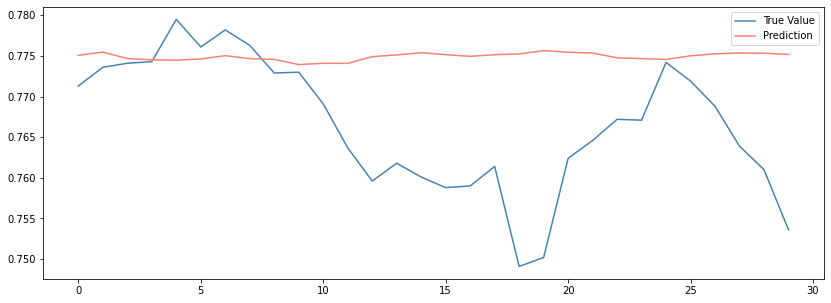

In [49]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue');
plt.plot(np.arange(len(y_val)), predictions, color='salmon');
plt.legend(['True Value', 'Prediction']);

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
mean_absolute_percentage_error(y_val,predictions)

1.1995946031744613

In [73]:
data1 = data1.rename(columns={'date' : 'ds','rate' : 'y'})

In [74]:
data1.shape

(5019, 2)

In [75]:
data1.head()

,ds,y
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.6070
4,2000-01-07,0.6104


In [76]:
training_data = data1[data1['ds']<='2018-12-31']
testing_data = data1[data1['ds']>='2019-01-01']

In [77]:
training_data.tail()

,ds,y
4949,2018-12-21,0.7886
4952,2018-12-26,0.7889
4953,2018-12-27,0.7920
4954,2018-12-28,0.7875
4955,2018-12-31,0.7835


In [78]:
testing_data.head()

,ds,y
4957,2019-01-02,0.7938
4958,2019-01-03,0.7916
4959,2019-01-04,0.7849
4960,2019-01-07,0.7839
4961,2019-01-08,0.7859


In [79]:
training_data.shape

(4770, 2)

In [80]:
testing_data.shape

(249, 2)

In [81]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 84 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [82]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638604 sha256=93a5144dd3773c11040378eccdb173d52849568e595c7864f31ec83969549056
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [83]:
from fbprophet import Prophet

In [84]:
prophet = Prophet()
prophet.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future_dates = prophet.make_future_dataframe(periods=249, freq='D', include_history=False)

In [86]:
prediction = prophet.predict(future_dates)

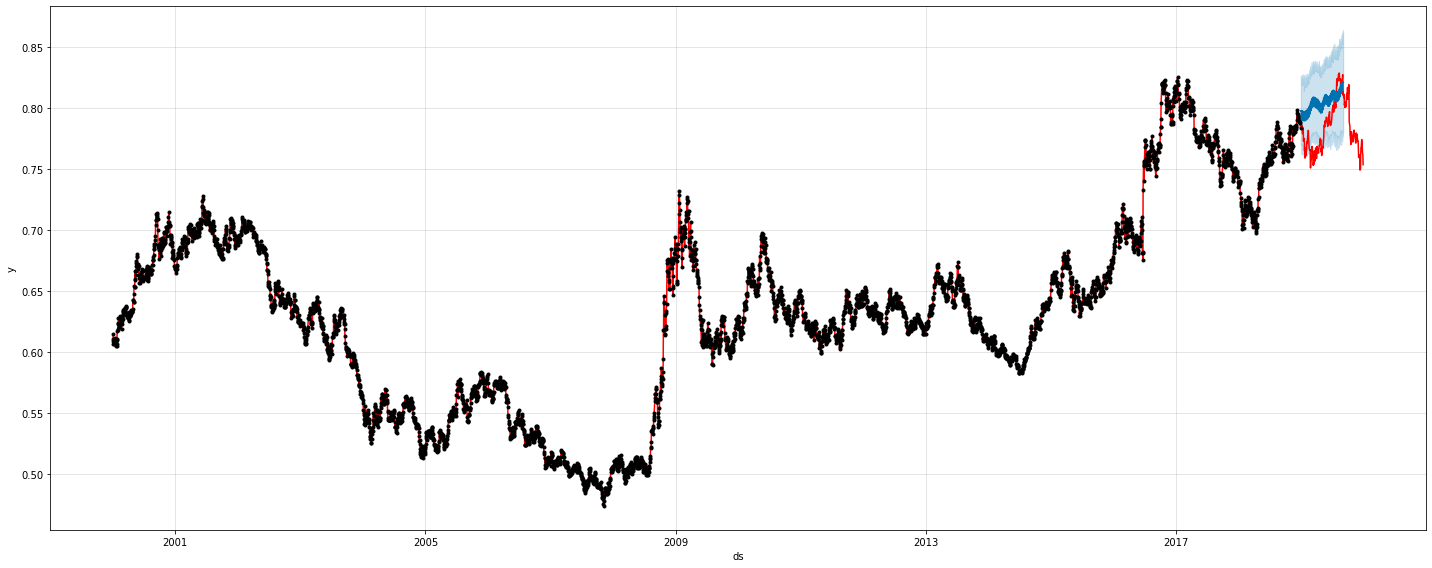

In [87]:
fig,axes = plt.subplots(figsize=(20,8))
plt.plot(data1.ds,data1.y,axes=axes,color='red')
prophet.plot(prediction, ax=axes)
plt.show()

In [88]:
temp = prediction[['ds','yhat']].rename(columns={
    'yhat' : 'y'
})

In [89]:
mean_absolute_percentage_error(testing_data.y,temp.y)

3.302232108000684